<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [48]:
# Paquetes necesarios
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import plotly.express as px # Para visualización
# Para PCA
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score #Silueta

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

,num_links,num_words,has_offer,sender_score,all_caps
0,3,98,1,0.718607,0
1,0,170,0,0.698901,1
2,0,38,0,0.620466,0
3,0,116,0,0.701755,0
4,3,89,1,0.583621,1
...,...,...,...,...,...
19995,1,22,1,0.614551,0
19996,3,154,0,1.000000,1
19997,4,109,0,0.935848,1
19998,2,197,0,0.481772,0


Esta es la cantida de NA que existe: 
 num_links       0
num_words       0
has_offer       0
sender_score    0
all_caps        0
dtype: int64


<Axes: >

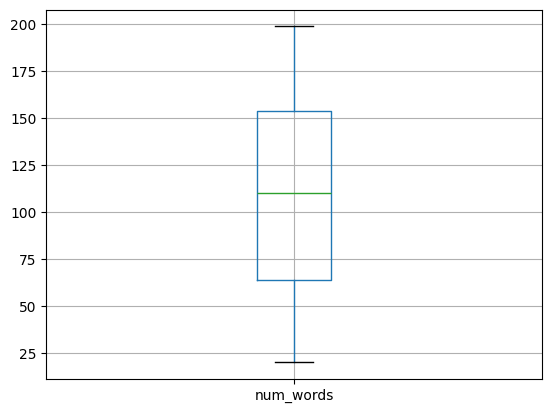

In [13]:
url = "https://raw.githubusercontent.com/Johnny-W-05/Aprendizaje-Automatico/main/dataset/spam_detection_dataset.csv"
df = pd.read_csv(url) #Cargamos los datos
df = df.drop(columns=['is_spam'])#Excluimos la variable objetivo is_spam
display(df) #Mostramos los datos
#Revisamos si existen na:
print("Esta es la cantida de NA que existe: \n", df.isna().sum())#No tiene NA´s
#Mostramos con estáadística descriptiva los datos
df.describe()
#Revisamos con una caja los datos que aparentan más desviación (num_words y num_links)
df.boxplot('num_words')

<Axes: >

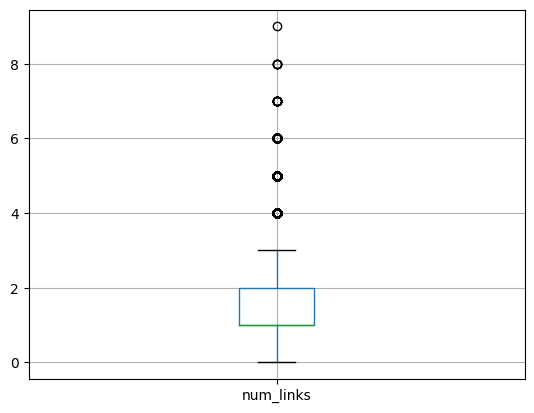

In [14]:
df.boxplot('num_links')
#Dado que el dataset podría depender de una mayor cantidad de links en un correo para detectarlo como spam no se tratarán estos outliers.

In [16]:
#No obstante, al ver que los datos poseen escalas distintas realizamos un escalado tipo standard scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
#Esto con el objetivo de que los datos con mayor escala (num_words y un poco num_links) se ajusten en escala a los otros datos.

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

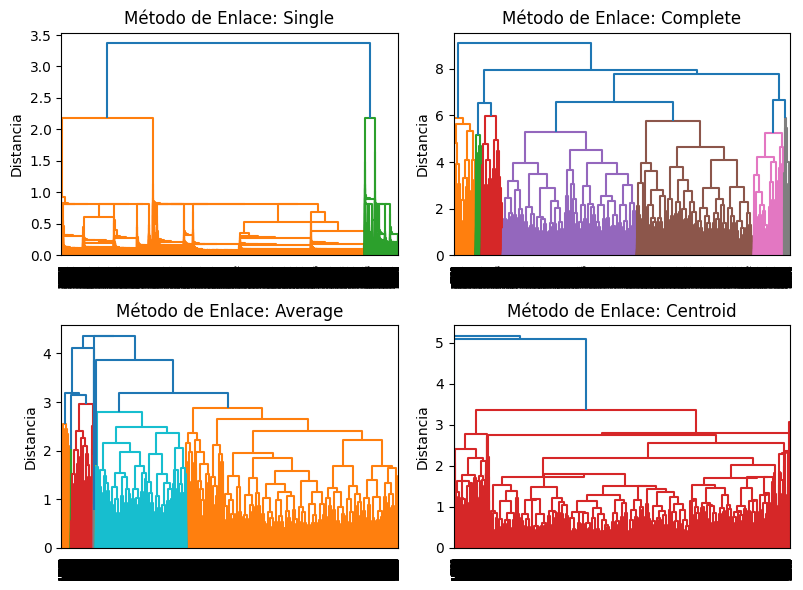

In [18]:
#Hacemos primero dendogramas de todas las 4 metricas conocidas:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

# Generar dendogramas en subplots
for i, method in enumerate(methods):
    linkage_matrix = linkage(df_scaled, method=method)
    dendrogram(linkage_matrix, ax=axes[i])
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

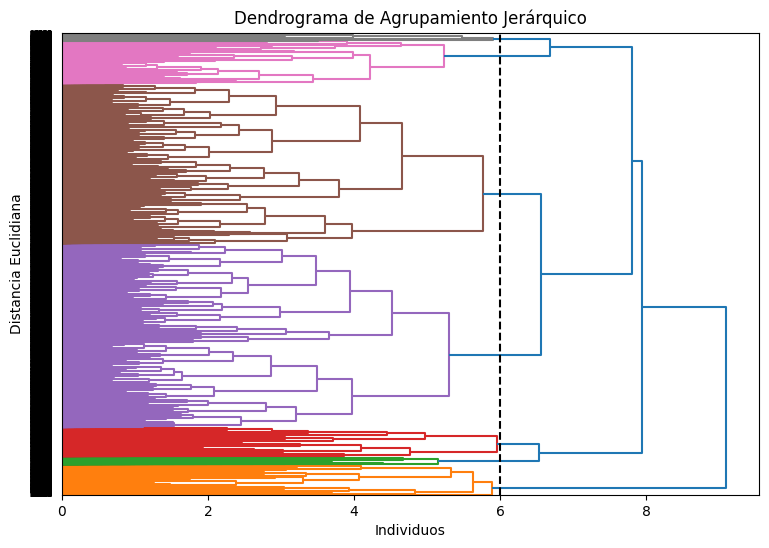

In [33]:
#tomamos la metrica complete y la distancia de corte 5
Z = linkage(df_scaled, method='complete')
distancia_corte = 6
# Calculamos el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z, orientation='right')
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

Tome la distancia de corte y la métrica de complete porque, como los datos son más de 20000, empezar de forma individual hubiera hecho clsuterización caótica en mi opinión al tener tantos conjuntos individuales, lo cual me hizo pensar que empezar de un cluster grande a cosas más específicas mejoraría el clusterizado en este tipo de datos. En cuanto a los puntos de corte, puse en 6 porque considero que para los datos de spam intuitivamente no deberían existir muchos grupos y visualmente la distancia de 6 era para mí indicada en ese sentido.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [36]:
clusters = fcluster(Z, t=distancia_corte, criterion='distance')
# Agregar la información de clúster como C1, C2, C3, etc.
df['Cluster'] = ['C' + str(c) for c in clusters]
# Revisar los primeros registros
display(df.head())

,num_links,num_words,has_offer,sender_score,all_caps,Cluster
0,3,98,1,0.718607,0,C1
1,0,170,0,0.698901,1,C3
2,0,38,0,0.620466,0,C5
3,0,116,0,0.701755,0,C4
4,3,89,1,0.583621,1,C3


In [39]:
#Revisamos la cantidad de integrantes por grupo
print("\nEsta es la cantidad de integrantes por grupos : \n", df['Cluster'].value_counts())

#Revisamos la media de cada grupo
print("\nEsta es la media de los grupos: ")
display(df.groupby('Cluster').mean())
#Revisamos máximo y mínimo
print("\nEste es el valor máximo de los grupos: ")
display(df.groupby('Cluster').max())
print("\nEste es el valor mínimo de los grupos: ")
display(df.groupby('Cluster').min())



Esta es la cantidad de integrantes por grupos : 
 Cluster
C4    7951
C5    6949
C6    1835
C1    1309
C3    1252
C2     366
C7     338
Name: count, dtype: int64

Esta es la media de los grupos: 


,num_links,num_words,has_offer,sender_score,all_caps
Cluster,,,,,
C1,4.024446,85.787624,0.350649,0.758016,0.0
C2,2.967213,88.562842,0.163934,0.738463,1.0
C3,1.170128,110.569489,0.333866,0.761027,1.0
C4,1.506980,148.534650,0.258458,0.739595,0.0
C5,1.042020,63.711757,0.323788,0.704536,0.0
C6,1.371662,130.589646,0.380381,0.403651,0.0
C7,1.144970,129.041420,0.340237,0.451466,1.0



Este es el valor máximo de los grupos: 


,num_links,num_words,has_offer,sender_score,all_caps
Cluster,,,,,
C1,9,199,1,1.000000,0
C2,7,198,1,1.000000,1
C3,4,199,1,1.000000,1
C4,4,199,1,1.000000,0
C5,3,154,1,1.000000,0
C6,5,199,1,0.625794,0
C7,6,199,1,0.720841,1



Este es el valor mínimo de los grupos: 


,num_links,num_words,has_offer,sender_score,all_caps
Cluster,,,,,
C1,3,20,0,0.212257,0
C2,2,20,0,0.279663,1
C3,0,20,0,0.330523,1
C4,0,62,0,0.353352,0
C5,0,20,0,0.060812,0
C6,0,20,0,0.000000,0
C7,0,20,0,0.000000,1


In [40]:
#Mostramos integrantes de cada grupo
for cluster in df['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {df[df["Cluster"] == cluster].shape[0]}')
    display(df[df['Cluster'] == cluster].head(5))

Cluster C1: cantidad de elementos 1309


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
0,3,98,1,0.718607,0,C1
39,4,41,0,0.470356,0,C1
48,5,130,0,0.591112,0,C1
49,4,47,1,1.000000,0,C1
79,3,89,1,0.754773,0,C1


Cluster C3: cantidad de elementos 1252


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
1,0,170,0,0.698901,1,C3
4,3,89,1,0.583621,1,C3
12,2,86,1,1.000000,1,C3
44,2,66,1,0.817382,1,C3
62,2,126,0,0.758903,1,C3


Cluster C5: cantidad de elementos 6949


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
2,0,38,0,0.620466,0,C5
7,0,113,0,0.600813,0,C5
19,2,70,0,1.000000,0,C5
21,1,100,1,0.839564,0,C5
23,0,70,1,0.758474,0,C5


Cluster C4: cantidad de elementos 7951


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
3,0,116,0,0.701755,0,C4
5,2,197,0,0.466201,0,C4
6,0,166,1,1.000000,0,C4
8,1,169,0,0.753108,0,C4
9,1,150,1,1.000000,0,C4


Cluster C6: cantidad de elementos 1835


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
13,2,58,1,0.370009,0,C6
36,1,128,0,0.567550,0,C6
51,1,188,0,0.426481,0,C6
54,0,133,0,0.371741,0,C6
71,1,133,0,0.611931,0,C6


Cluster C7: cantidad de elementos 338


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
16,4,169,1,0.598964,1,C7
43,1,182,0,0.571390,1,C7
105,1,174,1,0.503702,1,C7
134,1,129,1,0.451147,1,C7
235,0,151,0,0.532873,1,C7


Cluster C2: cantidad de elementos 366


,num_links,num_words,has_offer,sender_score,all_caps,Cluster
22,6,125,0,0.594219,1,C2
32,4,90,0,0.730046,1,C2
56,2,38,0,0.916180,1,C2
392,2,119,0,0.625678,1,C2
420,2,107,0,1.000000,1,C2


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Podemos ver que los grupos, además del número de palabras y de si tiene o no oferta que parecen no distinguir a los grupos, vemos que un poco el número de links y si el asunto está o no escrito en mayúsculas son los factores que de ciera manera distinguen más. Antes de eso y de acuerdo al significado del sender score (que dentro del dataset de Kaggle lo menciona) estos representan la probabilidad de que sea o no spam cuanto menor el valor es. Dado esto y viendo que todos exceptuando el clúster 6 y 7 tienen valores de máximo 1 (de hecho estos 2 son los únicos con mínimo 0 en sender_score), la primera división que se puede ahcer es:
* Cluster 6 y 7 con mayor probabilidad de spam (Lo llamaremos low score)
* Otros Clusters con menos probabilidad de ser spam (lo llamaremos normal score)

Ahora, tomando lo de los números de links y si se escribió o no con mayúscula podemos asignar los siguientes nombres:

* **C1**: Número máximo mayor y mayor mínimo de todos los clústeres (es decir el que maneja más cantidad de número de links) y sus valores de mayúsculas son 0 entonces es "Varios Links-No Mayúsculas-Normal Score".
* **C2**: Igual mayor número de  links pero su valor de all caps es 1 (asunto escrito en mayúscula)s. Por tanto se llamará "Varios Links-Mayúsculas-Normal Score".
* **C3**: número moderadamente bajo de links pero que se escriben con mayúsculas sus asuntos. Se llamará "Links Bajos Moderados-Mayúsculas-Normal Score".
* **C4**: Caso idéntico a C3 solo que con all caps en 0 (asuntos sin mayúscula). Por tanto se llamará  "Links Bajos Moderados-No Mayúsculas-Normal Score".
* **C5**: El caso con el máximo más bajo de todos los clusters y con asutos sin mayúsculas. Se llamará "Pocos Links-No Mayúsculas-Normal Score".
* **C6**: Con score bajo, numero moderado de links y asuntos sin mayúsculas. Lo llamamos "Links Moderados-No Mayúsculas-Low Score"
* **C7**: Mismo caso que C6 pero los asuntos se escriben con mayúsculas. Por tanto se llama "Links Moderados-Mayúsculas-Low Score"

Y con esto se termina de nombrar los clústers elegidos.


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [45]:
# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster'].values

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['Cluster'],
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

fig.show()

De acuerdo a la visualización, los grupos no se ven tan buenos en el sentido de que hay grupos que parecen se hicieron de más. Es decir, grupos o clústeres cuyos valores podían ir en otros por lo dispersos que están. Por ejemplo el Clúster C7 y C1 poarecen tener datis muy dispersos por lo que no parecen clústers en sí. Además de los Clusters C6 y C5 que parezen sobreponerse uno en otro. Por este motivo siento que la clusterización no fue la mejor. No obstante al momento de asignar los datos vimos, al menos por la variable all_caps, que los datos efectivamente tenían grupos distintos y por ello se considera también que fue un buen intento de clusterizado.

In [47]:
#Mostramos el porcentaje de la varianza explicada
print("Porcentaje de varianza explicada: ", pca.explained_variance_ratio_)
total = 0
for i in pca.explained_variance_ratio_:
    total += i
print("Porcentaje de varianza explicada total: ", total)

Porcentaje de varianza explicada:  [0.20334209 0.20167024]
Porcentaje de varianza explicada total:  0.4050123276334492


Con las dos componentes obtenidas vemos que se representa el 40,5% de la información del dataset. Esto a pesar que en una reducción resulta malo y se requerirían más componentes para un buen PCA, el efecto de visualización en mi consideración no debería verse afectado por esto porque visualmente cumple su función a pesar de no tener una amyor cantidad de datos representados ya que son las dos componentes más representativas y con ello las que deberían usarse para un gráfico en 2D. COn ello si se hicera un gráfico por ejemplo en 3D y alguna variable específica se representara mejor con una tercera componente ahí considero si sería importante.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [51]:
#Calculamos el índice de Silueta
silueta = silhouette_score(df_scaled, clusters)
print("El índice de silueta es: ", silueta)

El índice de silueta es:  0.13993224754384315


De acuerdo al índice de silueta con un valor de 0,14 decimos que son malos grupos, ya que un valor cercano a 0 en Silueta significa que hay un solapado considerable de los datos. Por los gráficos podríamos decir que existe poca separación de datos (más por ejemplo en clústeres como C6 y C5) y poca cohesión (más notado justamente en los clústeres C7 y C1) por lo cual se entiende que nos de un valor cercano a 0 al calcular Silueta.

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [56]:
#Primero generamos grupos con las métricas con dos cortes distintos y generamos clusteres para guardar la info y posteriormente calular silueta de cada uno
silueta_scores = []
methods = ['single', 'complete', 'average', 'centroid']

#Para el metodo complete
for j in methods:
  print("Método", j)
  Z = linkage(df_scaled, method=j)
  #Como cada método genera una escala de distancias distinta, sacamos también del Z el máximo de la distancia
  dist_max = int(Z[:, 2].max()) #Para que salga como entero
  for i in range(1, dist_max + 1): #Distancias para que sean clusters no tan variados pero suficientes para ver diferencias
      clusters = fcluster(Z, t=i, criterion='distance')
      silhouette_avg = silhouette_score(df_scaled, clusters)
      silueta_scores.append(silhouette_avg)
      print(f"Silueta para corte en distancia {i} : {silhouette_avg}")


Método single
Silueta para corte en distancia 1 : 0.2850075776685109
Silueta para corte en distancia 2 : 0.29908155369029
Silueta para corte en distancia 3 : 0.3924557060441594
Método complete
Silueta para corte en distancia 1 : 0.29587734021737816
Silueta para corte en distancia 2 : 0.18114087348588837
Silueta para corte en distancia 3 : 0.14205313458402813
Silueta para corte en distancia 4 : 0.09662244664189411
Silueta para corte en distancia 5 : 0.10276183879316568
Silueta para corte en distancia 6 : 0.13993224754384315
Silueta para corte en distancia 7 : 0.16405669683292184
Silueta para corte en distancia 8 : 0.1801912694177693
Silueta para corte en distancia 9 : 0.1801912694177693
Método average
Silueta para corte en distancia 1 : 0.2805480661743298
Silueta para corte en distancia 2 : 0.1528328488822022
Silueta para corte en distancia 3 : 0.23608654566848103
Silueta para corte en distancia 4 : 0.3277030039436951
Método centroid
Silueta para corte en distancia 1 : 0.183427553633064

Analizando los valores de Silueta en las distintas métricas y cortes en la distancia podemos ver lo siguiente:
* Para la métrica single, cuanto mayor era el valor del corte mejor valor de silueta daba. Viéndolo de forma general, fue uno de los valores de silueta más altos que se obtuvieron con el corte en el valor 3 de la distancia. Teniendo aproximadamente 0,4 en el valor de silueta.
* Para complete, parece que es la métrica que peor valor de silueta obtuvo de forma general. Se ve que decrecía su valor de silueta cuanto mayor era el corte de la distancia, sugiriendo que era una métrica que no ajustaba bien la cohesión y la separación de los clústeres.
* Para average, vemos que el corte si mejoró los valores de silueta cuanto mayor fue el valor del corte (a erxcepción del corte en 1) e indicando una buena métrica para tener un buen valor de Silueta (al menos dentro de lo que mejor se pudo con estos datos)
* Finalmente para centroide, obtuvo los mejores valores de silueta haciéndolo en ese caso la mejor métrica para mi dataset en cuato a clusterización por agrupamiento jerárquico. En ese sentido se evalúa tambien que a mayor valor del corte mejor valor de silueta obtuvo.

En conclusión, el valor de corte es importante para mejorar la clusterización y por ende el valor de silueta obtenido. Para este dataset específico, parece que la métrica con centroides era la mejor para agrupar los datos.